<a class="anchor" id="top"></a>
**Formation Data Scientist - Projet 5**

**Segmentez des clients d'un site e-commerce**

**Partie 2 : Modélisations**

Antoine LEPAGE <br /> 
yop1001@gmail.com

https://openclassrooms.com/fr/projects/630/assignment

**Table des matières**

1. [Preprocessing](#preprocessing)<br />
      
    1.1. [Choix des variables](#choix_variables)<br />
    1.2. [Standardisation](#standardisation)<br />
    1.3. [ACP](#acp)<br />
<br />
2. [Modélisations de all customers](#modelisations_all)<br />

    2.1 [KMeans](#kmeans)<br />
    2.2 [DBScan](#dbscan)<br />
    2.3 [Birch](#birch)<br />
    2.4. [Choix du modèle](#choix_modèle)<br />
<br />
4. [Maintenance](#maintenance)<br />

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
import collections, numpy

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import v_measure_score

sns.set_style("whitegrid")
golden_brazil = '#FFDF00'

In [2]:
def kmeans_elbow_method(array, fig_title):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
        kmeans.fit(array)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    plt.savefig('02 - Graphs/01 - Modelisation/KMeans - {}.png'.format(fig_title), dpi=200, bbox_inches='tight')

    plt.show()

In [3]:
def kmeans(array, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(array)
    
    # Calcul des centroides
    centers = kmeans.cluster_centers_
    
    # Calcul des groupes
    global groupes
    groupes = kmeans.labels_
    return groupes



***

In [4]:
# eps=maximum radius of the neighborhood
# min_samples = minumum number of points in the neighborhood to define a cluster

def dbscan(array, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(array)
    
    # Calcul des groupes
    global groupes
    groupes = dbscan.labels_

    # Calcul du % de bruit
    bruit_percent = ((collections.Counter(dbscan.labels_))[-1] / dbscan.labels_.size)*100
    print ('% de bruit :{}'.format(bruit_percent))

***


In [5]:
def meanshift(array, bandwidth):
    meanshift = MeanShift(bandwidth=bandwidth).fit(array)
    
    # Calcul des groupes
    global groupes
    groupes = meanshift.labels_
    return groupes

***

In [6]:
def groupes_boxplot(df, column, fig_title):
    variables = df.columns
    
    for i in variables:
        sns.boxplot(x=column, y=df[i] ,width=0.5, linewidth=1)
        plt.title('All customers - {}'.format(i) + ' selon le groupe' )
        plt.xlabel('Groupes')
        plt.savefig('02 - Graphs/01 - Modelisation/{}'.format(fig_title) + '- {}'.format(i) + '.png', dpi=200, bbox_inches='tight')
        plt.show() 

***

In [7]:
# Importation des données nettoyées
data_customers = pd.read_csv('data_customers.csv')

# Suppression de la colonne
data_customers.drop(['Unnamed: 0'], axis=1, inplace=True)
data_customers.head()

,customer_unique_id,nb_of_items_bought,total_spent,nb_of_baskets,items_by_basket(mean),time_length,oldest_purchase,anciennete,purchase_frequency,mean_purchase_frequency(days),...,review_score,nb_of_comments,%_of_comments,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,nb_of_sellers_used,sellers_loyalty
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,1,1.0,0 days 00:00:00.000000000,2018-05-10 10:56:27,111,NaN,NaN,...,5.0,1,100.0,7787,cajamar,SP,-23.335331,-46.828647,1,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,1,1.0,0 days 00:00:00.000000000,2018-05-07 11:11:27,114,NaN,NaN,...,4.0,0,0.0,6053,osasco,SP,-23.567395,-46.792957,1,0.0
2,0000f46a3911fa3c0805444483337064,1,69.00,1,1.0,0 days 00:00:00.000000000,2017-03-10 21:05:03,536,NaN,NaN,...,3.0,0,0.0,88115,sao jose,SC,-27.543787,-48.625680,1,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,1,1.0,0 days 00:00:00.000000000,2017-10-12 20:29:41,320,NaN,NaN,...,4.0,1,100.0,66812,belem,PA,-1.311011,-48.482884,1,0.0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,1,1.0,0 days 00:00:00.000000000,2017-11-14 19:45:42,287,NaN,NaN,...,5.0,0,0.0,18040,sorocaba,SP,-23.504368,-47.466156,1,0.0


***

In [8]:
# importations des tables pour prédire la maintenance
data_customers_1y = pd.read_csv('data_customers_1y.csv')
data_customers_1y_3m = pd.read_csv('data_customers_1y_3m.csv')
data_customers_1y_6m = pd.read_csv('data_customers_1y_6m.csv')
data_customers_1y_9m = pd.read_csv('data_customers_1y_9m.csv')
data_customers_2y = pd.read_csv('data_customers_2y.csv')

# Suppression de la colonne
data_customers_1y.drop(['Unnamed: 0'], axis=1, inplace=True)
data_customers_1y_3m.drop(['Unnamed: 0'], axis=1, inplace=True)
data_customers_1y_6m.drop(['Unnamed: 0'], axis=1, inplace=True)
data_customers_1y_9m.drop(['Unnamed: 0'], axis=1, inplace=True)
data_customers_2y.drop(['Unnamed: 0'], axis=1, inplace=True)


<a class="anchor" id="preprocessing"></a>
***
# 1. Preprocessing

<a class="anchor" id="choix_variables"></a>
***
## 1.1. Choix des variables

In [9]:
data_customers.columns

Index(['customer_unique_id', 'nb_of_items_bought', 'total_spent',
       'nb_of_baskets', 'items_by_basket(mean)', 'time_length',
       'oldest_purchase', 'anciennete', 'purchase_frequency',
       'mean_purchase_frequency(days)', 'td', 'Appliances', 'Art', 'Auto',
       'Cool_stuff', 'Culture', 'Fashion', 'Food', 'Furniture', 'High-Tech',
       'Home', 'Hygiene', 'Kid's', 'Leisure', 'Other', 'Pet-Shop',
       'Stationery', 'Telephony', 'Tools', 'review_score', 'nb_of_comments',
       '%_of_comments', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_lat', 'geolocation_lng',
       'nb_of_sellers_used', 'sellers_loyalty'],
      dtype='object')

Exprimer les sommes dépensées par le client
- total_spent
- nb_of_items_bought

Exprimer la régularité du client :
- nb_of_baskets
- mean_purchase_frequency(days)

Exprimer la fidélité du client à un vendeur :
- sellers_loyalty

Exprimer les dépenses dans différentes catégories de produits :
- Appliances,
- Art
- Auto
- Cool_stuff
- Culture
- Fashion
- Food
- Furniture 
- High-Tech
- Home
- Hygiene
- Kid's
- Leisure
- Other
- Pet-Shop
- Stationery
- Telephony
- Tools

Exprimer l'ancienneté du client 
- anciennete

Exprimer la satisfaction du client 
- review_score
- %_of_comments

Exprimer la location 
- geolocation_lat
- geolocation_lng


In [10]:
# Choix des variables pour l'ensemble des clients
all_customers = data_customers[['customer_unique_id', 'total_spent', 'nb_of_items_bought', 
                                'nb_of_baskets', 'mean_purchase_frequency(days)', 
                                'anciennete', 'review_score', 'geolocation_lat', 'geolocation_lng']]
all_customers.set_index('customer_unique_id', inplace=True)
all_customers.head()

,total_spent,nb_of_items_bought,nb_of_baskets,mean_purchase_frequency(days),anciennete,review_score,geolocation_lat,geolocation_lng
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,1,NaN,111,5.0,-23.335331,-46.828647
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,1,NaN,114,4.0,-23.567395,-46.792957
0000f46a3911fa3c0805444483337064,69.00,1,1,NaN,536,3.0,-27.543787,-48.625680
0000f6ccb0745a6a4b88665a16c9f078,25.99,1,1,NaN,320,4.0,-1.311011,-48.482884
0004aac84e0df4da2b147fca70cf8255,180.00,1,1,NaN,287,5.0,-23.504368,-47.466156


In [11]:
# Convertir les NaN en 0
all_customers['mean_purchase_frequency(days)'] = all_customers['mean_purchase_frequency(days)'].fillna(0)
all_customers.head()

C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,total_spent,nb_of_items_bought,nb_of_baskets,mean_purchase_frequency(days),anciennete,review_score,geolocation_lat,geolocation_lng
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,1,0.0,111,5.0,-23.335331,-46.828647
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,1,0.0,114,4.0,-23.567395,-46.792957
0000f46a3911fa3c0805444483337064,69.00,1,1,0.0,536,3.0,-27.543787,-48.625680
0000f6ccb0745a6a4b88665a16c9f078,25.99,1,1,0.0,320,4.0,-1.311011,-48.482884
0004aac84e0df4da2b147fca70cf8255,180.00,1,1,0.0,287,5.0,-23.504368,-47.466156


In [12]:
all_customers.shape

(93616, 8)

<a class="anchor" id="standardisation"></a>
***
## 1.2. Standardisation

In [13]:
# from sklearn import preprocessing

# Standardisons les données all_customers
std_scale = preprocessing.StandardScaler().fit(all_customers)
all_customers_scaled = std_scale.transform(all_customers)

C:\Users\Yop1001\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


<a class="anchor" id="acp"></a>
***
## 1.4. ACP

In [14]:
# ACP sur one_shot_customers
from sklearn import decomposition

# Création d'un objet ACP - sans spécifier le nombre de composantes
pca = decomposition.PCA()

# On peut également demander à sklearn de choisir le nombre de PCA pour respecter que 95% (exemple) dela variance soit expliquee
# pca =PCA(0.95)

# Appliquer l'objet PCA aux données normalisées
pca.fit(all_customers_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
# Calcul de la fraction de la variance est expliquee
print(pca.explained_variance_ratio_)

[0.23616232 0.18389382 0.1331324  0.12385384 0.11689792 0.08943845
 0.06800447 0.04861679]


In [16]:
# Si on veut la somme cumulative
print(pca.explained_variance_ratio_.cumsum())

[0.23616232 0.42005614 0.55318854 0.67704238 0.7939403  0.88337874
 0.95138321 1.        ]


Les données sont trop complexes pour pouvoir etre synthétisées en 2 composantes principales.

On ne pourra visualiser nos données en 2D

In [17]:
# Visualisation en 2D

# Création d'un objet ACP avec 2 composantes
pca = decomposition.PCA(n_components=2)

# Appliquer l'objet PCA aux données normalisées
pca.fit(all_customers_scaled)

# projeter les données initiales sur les 2 axes
X_projected = pca.transform(all_customers_scaled)
print(X_projected.shape)

(93616, 2)


In [18]:
data_acp = pd.DataFrame(data=X_projected)
data_acp.rename(columns={0:'PC1', 1:'PC2'}, inplace=True)
data_acp.head()

,PC1,PC2
0,-0.460932,-0.522424
1,-0.538420,-0.471319
2,-0.058851,-1.022362
3,-0.382384,2.038020
4,-0.248809,-0.585283


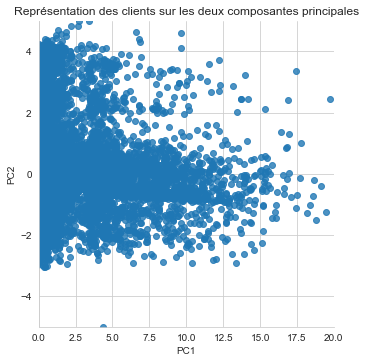

In [19]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=data_acp, fit_reg=False, legend=False, palette=['r', 'g'])
 
plt.xlim([0, 20])
plt.ylim([-5, 5])

plt.title('Représentation des clients sur les deux composantes principales')

plt.savefig('02 - Graphs/01 - Modelisation/ACP.png', dpi=200, bbox_inches='tight')

plt.show()

Même si les 2 composantes principales ne synthètisent que 42% de l'information, on remarque qu'il va être compliqué d'effectuer un clustering

<a class="anchor" id="modelisations_all"></a>
***
# 2. Modélisations de all_customers

<a class="anchor" id="kmeans"></a>
***
## 2.1. KMeans

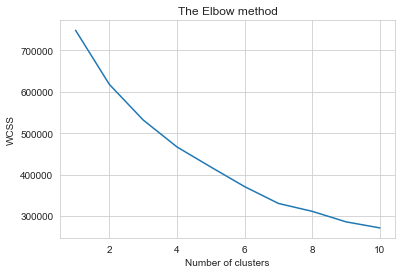

In [20]:
# Détection du nombre adéquat de groupes
kmeans_elbow_method(all_customers_scaled, 'elbow_method')


In [21]:
# Application du Kmeans
kmeans(all_customers_scaled, 4)

array([0, 0, 3, ..., 0, 0, 0])

In [22]:
# Ajoutons cet array aux données initiales
all_customers['groupe'] = groupes
all_customers.head()

C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,total_spent,nb_of_items_bought,nb_of_baskets,mean_purchase_frequency(days),anciennete,review_score,geolocation_lat,geolocation_lng,groupe
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,1,0.0,111,5.0,-23.335331,-46.828647,0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,1,0.0,114,4.0,-23.567395,-46.792957,0
0000f46a3911fa3c0805444483337064,69.00,1,1,0.0,536,3.0,-27.543787,-48.625680,3
0000f6ccb0745a6a4b88665a16c9f078,25.99,1,1,0.0,320,4.0,-1.311011,-48.482884,1
0004aac84e0df4da2b147fca70cf8255,180.00,1,1,0.0,287,5.0,-23.504368,-47.466156,0


In [23]:
all_customers['groupe'].value_counts()

0    62906
3    17968
1     9888
2     2854
Name: groupe, dtype: int64

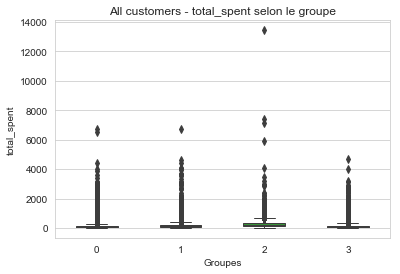

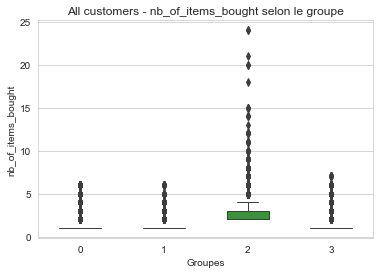

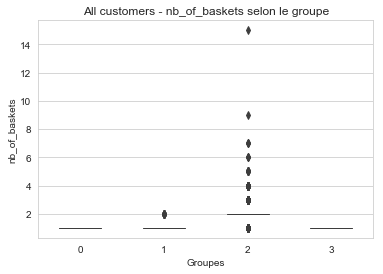

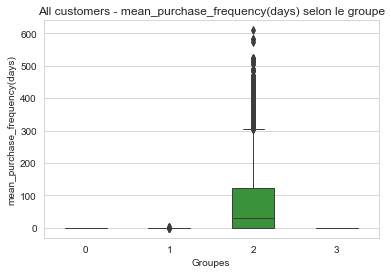

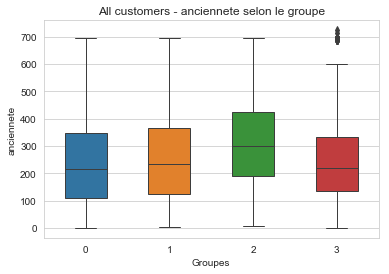

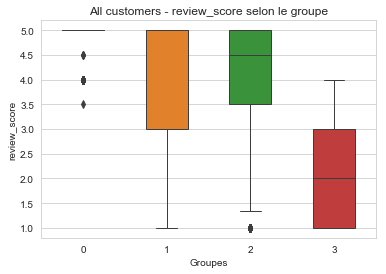

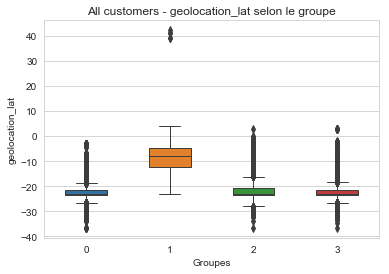

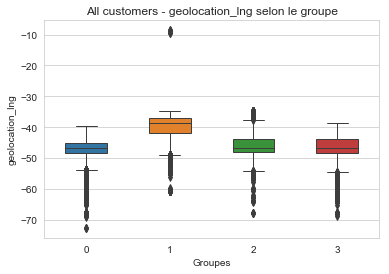

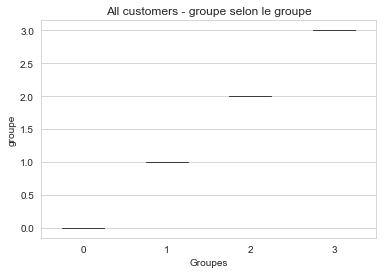

In [24]:
# Visualisation des différents groupes
groupes_boxplot(all_customers, all_customers['groupe'], 'KMeans - boxplots')

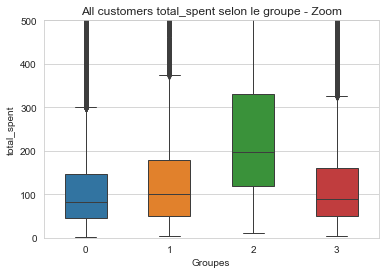

In [74]:
# Zoom 
sns.boxplot(x=all_customers['groupe'], y=all_customers['total_spent'] ,width=0.5, linewidth=1)
plt.title('All customers total_spent selon le groupe - Zoom' )
plt.ylim(0, 500)
plt.xlabel('Groupes')
plt.savefig('02 - Graphs/01 - Modelisation/KMeans - boxplots- total_spent - zoom.png', dpi=200, bbox_inches='tight')
plt.show() 

**Interpretation des groupes:**
- G0 : clients ayant fait une commande et extrèmement satisfaits
- G1 : clients du Nordeste
- G2 : clients fidèles ayant commandés plusieurs articles
- G3 : clients les - satisfaits

In [25]:
# Géolocalisation du groupe 1
group_1 = all_customers.loc[all_customers['groupe'] == 1]
IFrame('https://yop1001.carto.com/builder/d6ce20e9-2ec3-4634-982e-c7ab7d51ef21/embed', width=700, height=700)

![Image of Brasilian regions](https://viajerobrasil.com/wp-content/uploads/2015/01/mapa-brasil-2-839x735.jpg?x27162)

In [26]:
# Sauvegarde de la table data
# group_1.to_excel("groupe_1.xlsx")

***

In [27]:
data_acp['Groupe_kmeans'] = groupes
data_acp.head()

,PC1,PC2,Groupe_kmeans
0,-0.460932,-0.522424,0
1,-0.538420,-0.471319,0
2,-0.058851,-1.022362,3
3,-0.382384,2.038020,1
4,-0.248809,-0.585283,0


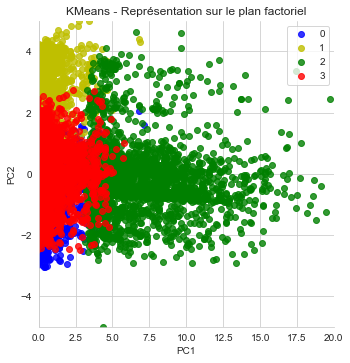

In [28]:
# Visualisation ds groupes sur le plan ACP

# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="PC1", y="PC2", data=data_acp, fit_reg=False, 
           hue='Groupe_kmeans', legend=False, palette=['b', 'y', 'g', 'r'])
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.xlim([0, 20])
plt.ylim([-5, 5])

plt.title('KMeans - Représentation sur le plan factoriel')
plt.savefig('02 - Graphs/01 - Modelisation/KMeans - ACP.png', dpi=200, bbox_inches='tight')
plt.show()

In [29]:
# Calcul du coefficient de silhouette
# Source : https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library
# from sklearn.metrics import silhouette_score

silhouette_kmeans_all = silhouette_score (all_customers_scaled, groupes, metric='euclidean')
silhouette_kmeans_all

0.2894924418534343

<a class="anchor" id="dbscan"></a>
***
## 2.2. DBScan

In [30]:
dbscan(all_customers_scaled, 0.8, 50)

% de bruit :9.23987352589301


In [31]:
# Ajoutons cet array aux données initiales
all_customers['groupe_dbscan'] = groupes
all_customers['groupe_dbscan'].value_counts()

C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 0    78916
-1     8650
 1     5434
 2      298
 3      211
 4      107
Name: groupe_dbscan, dtype: int64

Noisy samples are given the label -1

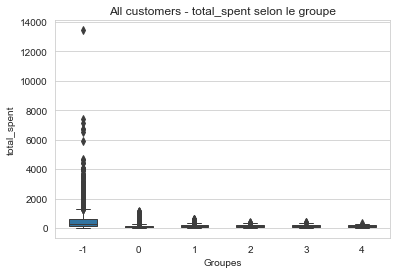

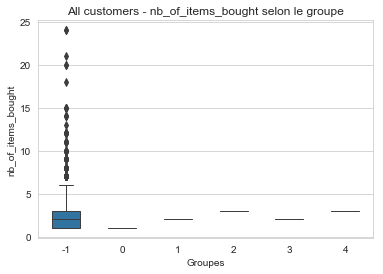

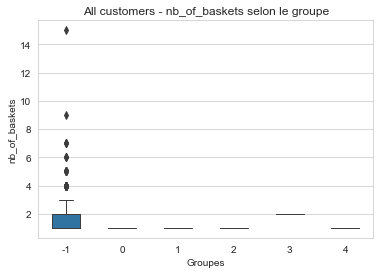

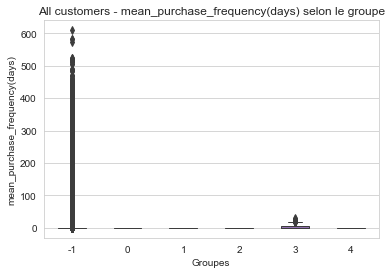

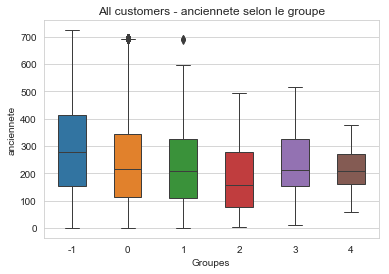

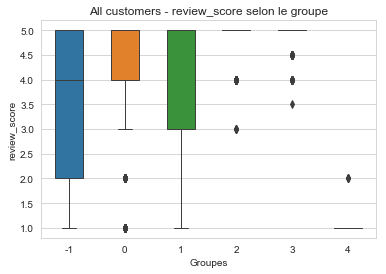

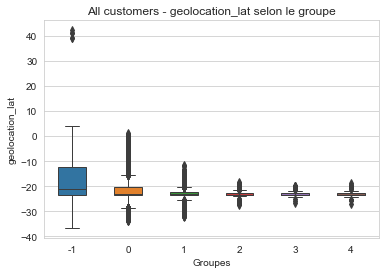

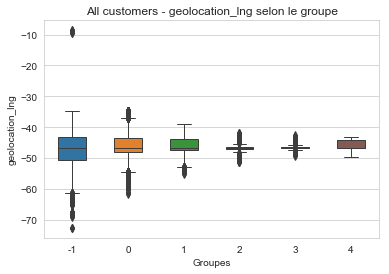

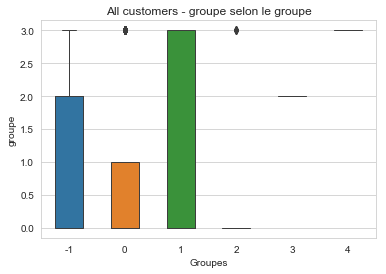

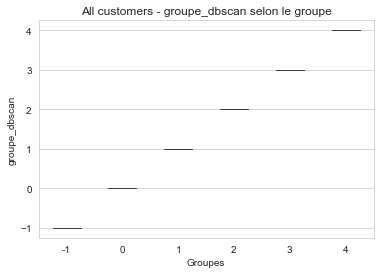

In [32]:
# Visualisation des différents groupes
groupes_boxplot(all_customers, all_customers['groupe_dbscan'], 'DBScan - boxplots')

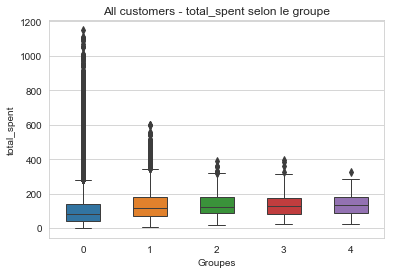

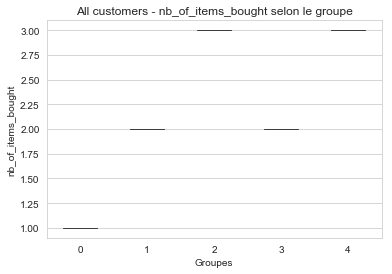

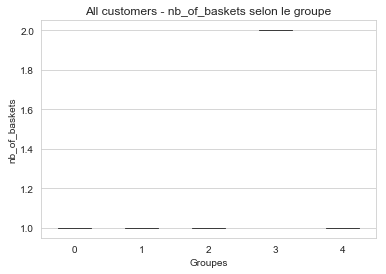

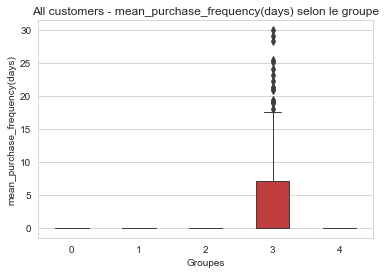

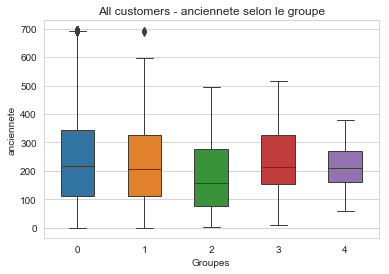

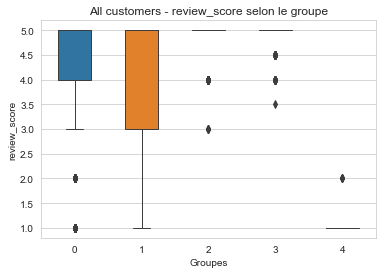

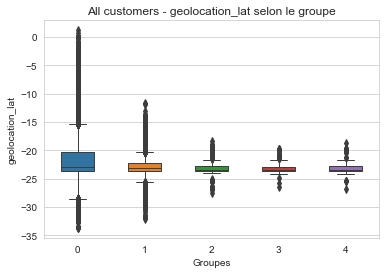

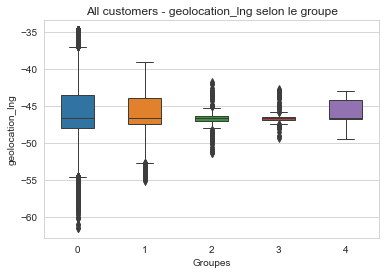

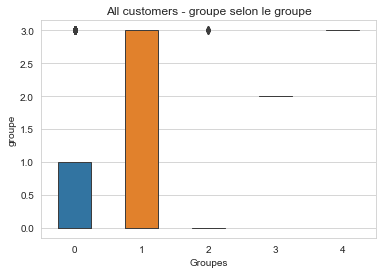

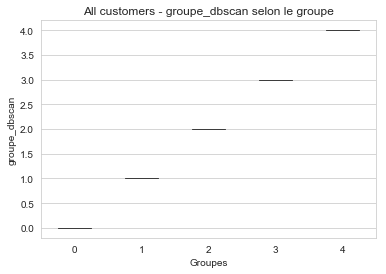

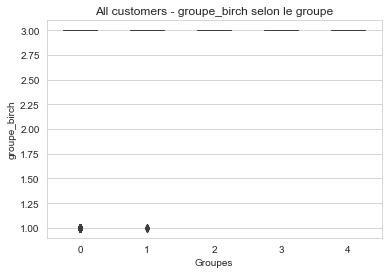

In [69]:
# Visualisation des différents groupes hors outliers
dbscan_customers = all_customers.loc[all_customers['groupe_dbscan'] != -1]

groupes_boxplot(dbscan_customers, dbscan_customers['groupe_dbscan'], 'DBScan hors outliers - boxplots')

Pas de résultats tangible

***

In [33]:
data_acp['Groupe_dbscan'] = groupes
data_acp.head()

,PC1,PC2,Groupe_kmeans,Groupe_dbscan
0,-0.460932,-0.522424,0,0
1,-0.538420,-0.471319,0,0
2,-0.058851,-1.022362,3,0
3,-0.382384,2.038020,1,0
4,-0.248809,-0.585283,0,0


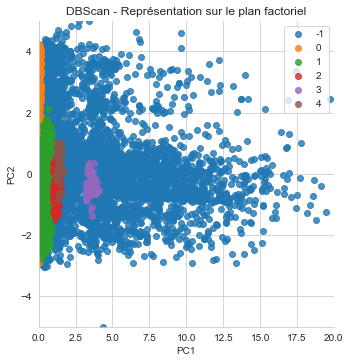

In [34]:
# Visualisation ds groupes sur le plan ACP

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=data_acp, fit_reg=False, hue='Groupe_dbscan', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.xlim([0, 20])
plt.ylim([-5, 5])
    
plt.title('DBScan - Représentation sur le plan factoriel')
plt.savefig('02 - Graphs/01 - Modelisation/DBScan - ACP.png', dpi=200, bbox_inches='tight')
plt.show()

In [35]:
# Coefficient de silhouette
silhouette_dbscan_all = silhouette_score(all_customers_scaled, groupes, metric='euclidean')
silhouette_dbscan_all

0.09285243515454782

In [36]:
all_customers_2 = all_customers.loc[all_customers['groupe_dbscan'] != -1]
all_customers_3 = all_customers_2.iloc[:, 0:-2]
all_customers_3.head()

,total_spent,nb_of_items_bought,nb_of_baskets,mean_purchase_frequency(days),anciennete,review_score,geolocation_lat,geolocation_lng
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,1,0.0,111,5.0,-23.335331,-46.828647
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,1,0.0,114,4.0,-23.567395,-46.792957
0000f46a3911fa3c0805444483337064,69.00,1,1,0.0,536,3.0,-27.543787,-48.625680
0000f6ccb0745a6a4b88665a16c9f078,25.99,1,1,0.0,320,4.0,-1.311011,-48.482884
0004aac84e0df4da2b147fca70cf8255,180.00,1,1,0.0,287,5.0,-23.504368,-47.466156


In [37]:
std_scale = preprocessing.StandardScaler().fit(all_customers_3)
all_customers_3_scaled = std_scale.transform(all_customers_3)

C:\Users\Yop1001\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [38]:
# Quid coefficient de silhouette sans les -1
silhouette_dbscan_all = silhouette_score(all_customers_3_scaled, all_customers_2['groupe_dbscan'], metric='euclidean')
silhouette_dbscan_all

0.37969805127398415

<a class="anchor" id="birch"></a>
***
## 2.3. Birch

https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9

BIRCH provides a clustering method for very large datasets. It makes a large clustering problem plausible by concentrating on densely occupied regions, and creating a compact summary. BIRCH can work with any given amount of memory, 

BIRCH for short, deals with large datasets by first generating a more compact summary that retains as much distribution information as possible, and then clustering the data summary instead of the original dataset.





In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch
from sklearn.cluster import Birch
brc = Birch(branching_factor=150, n_clusters=4, threshold=1.3, compute_labels=True)
brc.fit(all_customers_scaled) 
brc.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [40]:
# Ajoutons cet array aux données initiales
all_customers['groupe_birch'] = brc.labels_
all_customers['groupe_birch'].value_counts()

C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3    87741
1     4817
2      677
0      381
Name: groupe_birch, dtype: int64

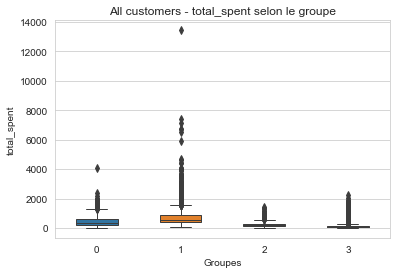

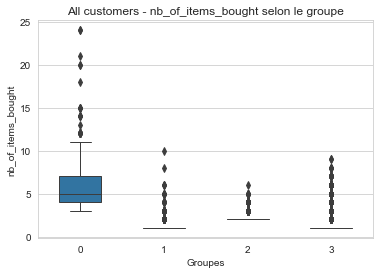

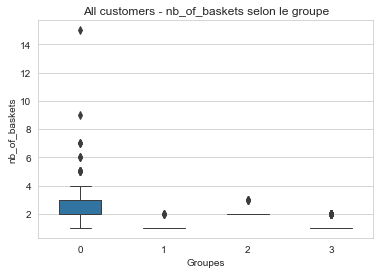

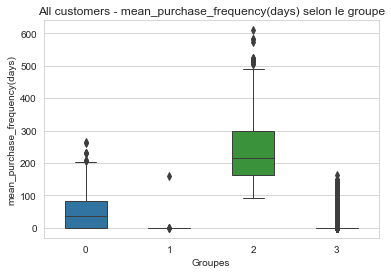

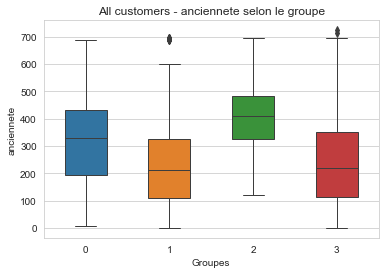

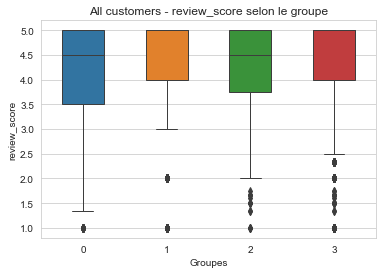

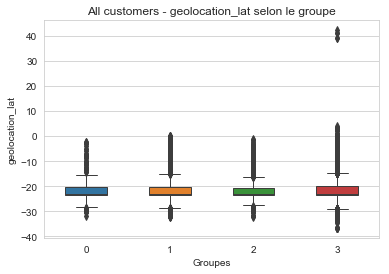

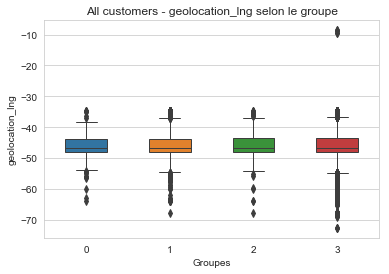

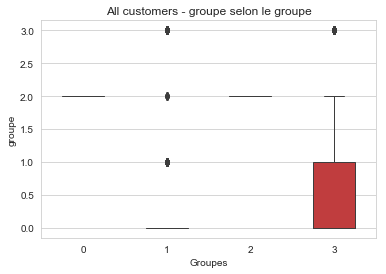

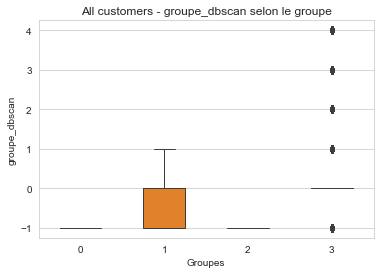

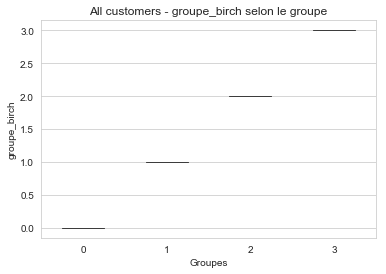

In [41]:
# Visualisation des différents groupes
groupes_boxplot(all_customers, all_customers['groupe_birch'], 'Birch - boxplots')

***

In [42]:
data_acp['groupe_birch'] = brc.labels_
data_acp.head()

,PC1,PC2,Groupe_kmeans,Groupe_dbscan,groupe_birch
0,-0.460932,-0.522424,0,0,3
1,-0.538420,-0.471319,0,0,3
2,-0.058851,-1.022362,3,0,3
3,-0.382384,2.038020,1,0,3
4,-0.248809,-0.585283,0,0,3


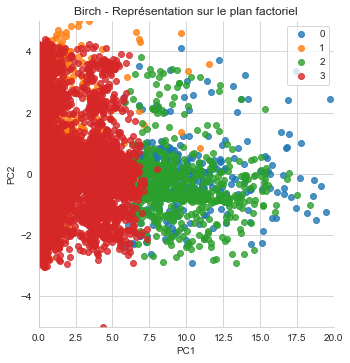

In [43]:
# Visualisation ds groupes sur le plan ACP

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=data_acp, fit_reg=False, hue='groupe_birch', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.xlim([0, 20])
plt.ylim([-5, 5])

plt.title('Birch - Représentation sur le plan factoriel')
plt.savefig('02 - Graphs/01 - Modelisation/Birch - ACP.png', dpi=200, bbox_inches='tight')
plt.show()

In [44]:
# Coefficient de silhouette
silhouette_birch_all = silhouette_score(all_customers_scaled, brc.labels_, metric='euclidean')
silhouette_birch_all

0.30119068112908093

<a class="anchor" id="choix_modele"></a>
***
## 2.4. Choix du modèle

<a class="anchor" id="maintenance"></a>
***
# 3. Maintenance

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

https://stats.stackexchange.com/questions/95782/what-are-the-most-common-metrics-for-comparing-two-clustering-algorithms-especi

https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness

In [45]:
# % des premiers clients (avant 1 an) sur l'ensemble des clients
(data_customers_1y.shape[0]/data_customers.shape[0]) * 100

23.80041873184071

In [46]:
def df_cleaning(df):
    # Choix des variables
    df = df[['customer_unique_id', 'total_spent', 'nb_of_items_bought', 'nb_of_baskets', 'mean_purchase_frequency(days)',
                                'anciennete', 'review_score', 'geolocation_lat', 'geolocation_lng']]
    
    # Set index
    df.set_index('customer_unique_id', inplace=True)
    
    # NaN to 0
    df['mean_purchase_frequency(days)'] = df['mean_purchase_frequency(days)'].fillna(0)
    
    return df

In [47]:
# Préprocessing des dataframes
data_customers_1y = df_cleaning(data_customers_1y)
data_customers_1y_3m = df_cleaning(data_customers_1y_3m)
data_customers_1y_6m = df_cleaning(data_customers_1y_6m)
data_customers_1y_9m = df_cleaning(data_customers_1y_9m)
data_customers_2y = df_cleaning(data_customers_2y)

C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [48]:
# Standardisons les données
std_scale = preprocessing.StandardScaler().fit(data_customers_1y)
data_customers_1y_scaled = std_scale.transform(data_customers_1y)

std_scale = preprocessing.StandardScaler().fit(data_customers_1y_3m)
data_customers_1y_3m_scaled = std_scale.transform(data_customers_1y_3m)

std_scale = preprocessing.StandardScaler().fit(data_customers_1y_6m)
data_customers_1y_6m_scaled = std_scale.transform(data_customers_1y_6m)

std_scale = preprocessing.StandardScaler().fit(data_customers_1y_9m)
data_customers_1y_9m_scaled = std_scale.transform(data_customers_1y_9m)

std_scale = preprocessing.StandardScaler().fit(data_customers_2y)
data_customers_2y_scaled = std_scale.transform(data_customers_2y)

C:\Users\Yop1001\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yop1001\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yop1001\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Yop1001\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with in

***

In [49]:
# Création d'un nouveau df avec les premiers clients 
data_maintenance = pd.DataFrame(data=data_customers_1y.index)

In [50]:
# Appliquons un kmeans à l'ensemble des df pour la maintenance

# création d'un dictionnaire
dict1 = {'Groupe_1y': data_customers_1y_scaled,
         'Groupe_1y_3m': data_customers_1y_3m_scaled,
         'Groupe_1y_6m': data_customers_1y_6m_scaled,
         'Groupe_1y_9m': data_customers_1y_9m_scaled,
         'Groupe_2y': data_customers_2y_scaled}

# for loop
for key, value in dict1.items():
    # Application du Kmeans
    kmeans(value, 4)

    # Ajoutons cet array aux données initiales
    data_maintenance[key] = groupes
    
data_maintenance.head()

,customer_unique_id,Groupe_1y,Groupe_1y_3m,Groupe_1y_6m,Groupe_1y_9m,Groupe_2y
0,0000f46a3911fa3c0805444483337064,0,3,1,1,3
1,0005e1862207bf6ccc02e4228effd9a0,2,0,3,2,1
2,0006fdc98a402fceb4eb0ee528f6a8d4,0,3,1,1,3
3,000a5ad9c4601d2bbdd9ed765d5213b3,2,0,3,2,1
4,000de6019bb59f34c099a907c151d855,0,3,1,1,3


In [51]:
data_maintenance['Groupe_1y'].value_counts()

2    15158
0     3958
1     2585
3      580
Name: Groupe_1y, dtype: int64

In [52]:
data_maintenance['Groupe_1y_3m'].value_counts()

0    15015
3     3924
1     2573
2      769
Name: Groupe_1y_3m, dtype: int64

In [53]:
data_maintenance['Groupe_1y_6m'].value_counts()

3    14896
1     3903
0     2555
2      927
Name: Groupe_1y_6m, dtype: int64

In [54]:
data_maintenance['Groupe_1y_9m'].value_counts()

2    14798
1     3903
0     2562
3     1018
Name: Groupe_1y_9m, dtype: int64

In [55]:
data_maintenance['Groupe_2y'].value_counts()

1    14732
3     3899
0     2558
2     1092
Name: Groupe_2y, dtype: int64

***

In [56]:
# Calcul des v_measure 
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html
# from sklearn.metrics.cluster import v_measure_score
v_measure_3m = v_measure_score(data_maintenance['Groupe_1y'], data_maintenance['Groupe_1y_3m'])
v_measure_3m

0.958506504089196

In [57]:
v_measure_6m = v_measure_score(data_maintenance['Groupe_1y'], data_maintenance['Groupe_1y_6m'])
v_measure_6m

0.9296042570036392

In [58]:
v_measure_9m = v_measure_score(data_maintenance['Groupe_1y'], data_maintenance['Groupe_1y_9m'])
v_measure_9m

0.9098381870861171

In [59]:
v_measure_2y = v_measure_score(data_maintenance['Groupe_1y'], data_maintenance['Groupe_2y'])
v_measure_2y

0.8962728697640192

In [60]:
# Création d'un nouveau df avec les premiers clients 
v_measures = pd.DataFrame(data=[v_measure_3m, v_measure_6m, v_measure_9m, v_measure_2y], index=['1y_3m', '1y_6m', '1y_9m', '2y'])
v_measures.columns = ['v_measures']
v_measures 

,v_measures
1y_3m,0.958507
1y_6m,0.929604
1y_9m,0.909838
2y,0.896273


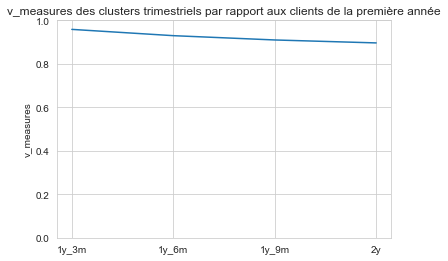

In [75]:
# Visualisation 
sns.lineplot(x=v_measures.index, y="v_measures", data=v_measures)

plt.title('v_measures des clusters trimestriels par rapport aux clients de la première année')
plt.ylim([0, 1])

plt.savefig('02 - Graphs/01 - Modelisation/v_measures.png', dpi=200, bbox_inches='tight')

plt.show()

***

In [62]:
# Adjusted rand score
from sklearn import metrics
metrics.adjusted_rand_score(data_maintenance['Groupe_1y'], data_maintenance['Groupe_1y_3m'])  

0.9802912477414856

***

In [63]:
# Voir toutes les variables
%whos 

Variable                      Type              Data/Info
---------------------------------------------------------
Birch                         type              <class 'sklearn.cluster.birch.Birch'>
DBSCAN                        type              <class 'sklearn.cluster.dbscan_.DBSCAN'>
IFrame                        type              <class 'IPython.lib.display.IFrame'>
KMeans                        type              <class 'sklearn.cluster.k_means_.KMeans'>
MeanShift                     type              <class 'sklearn.cluster.mean_shift_.MeanShift'>
X_projected                   ndarray           93616x2: 187232 elems, type `float64`, 1497856 bytes (1.428466796875 Mb)
all_customers                 DataFrame                                  <...>[93616 rows x 11 columns]
all_customers_2               DataFrame                                  <...>[84966 rows x 10 columns]
all_customers_3               DataFrame                                  <...>n[84966 rows x 8 columns]
all_c

***
[Top de la page](#top)